<a href="https://colab.research.google.com/github/x-Lysandre/minor-project/blob/main/EquationSolver.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
import pandas as pd
import cv2
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
import keras
import os

In [8]:
import zipfile
import os
def unzip_dataset(zip_file_path, extraction_path):
    if not os.path.exists(extraction_path):
        os.makedirs(extraction_path)

    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        zip_ref.extractall(extraction_path)

    print(f"Dataset successfully extracted to {extraction_path}")

# Example usage
zip_file_path = '/content/drive/MyDrive/minor project/dataset.zip'

extraction_path = 'minor_project'

unzip_dataset(zip_file_path, extraction_path)

Dataset successfully extracted to minor_project


In [9]:
symbols_list = ['zero','one','two','three','four','five','six','seven','eight','nine','minus','plus','equal','div','decimal','times']

In [12]:
dataset_path = "/content/minor_project/train"
train_image = []
train_label = []

for symbols_dir in os.listdir(dataset_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(dataset_path + "/" + symbols_dir):
            train_label.append(symbols_dir.split()[0])
            train_image.append(dataset_path + "/" + symbols_dir + "/" + image)

In [13]:
eval_path = "/content/minor_project/eval"
test_image = []
test_label = []

for symbols_dir in os.listdir(eval_path):
    if symbols_dir.split()[0] in symbols_list:
        for image in os.listdir(eval_path + "/" + symbols_dir):
            test_label.append(symbols_dir.split()[0])
            test_image.append(eval_path + "/" + symbols_dir + "/" + image)

In [14]:
print("Length of train_image : " , len(train_image) , " , length of labels list : " ,len(train_label))
print("Length of test_image : " , len(test_image) , " , length of labels list : " ,len(test_label))

Length of train_image :  7557  , length of labels list :  7557
Length of test_image :  1010  , length of labels list :  1010


In [15]:

import tensorflow as tf

def load_and_process_image(path):
    img = tf.io.read_file(path)
    img = tf.image.decode_image(img, channels=3)
    img = tf.image.resize(img, [128, 128]) / 255.0  # Resize and normalize
    return img

# Process images with TensorFlow's map function for parallel execution
X_train = np.array([load_and_process_image(path).numpy() for path in train_image])
X_test = np.array([load_and_process_image(path).numpy() for path in test_image])



In [16]:
len(X_train)

7557

In [17]:
print("X_train shape: ", X_train.shape)
print("X_test shape: ", X_test.shape)

X_train shape:  (7557, 128, 128, 3)
X_test shape:  (1010, 128, 128, 3)


In [18]:
label_encoder = preprocessing.LabelEncoder()
y_train_temp = label_encoder.fit_transform(train_label)
y_test_temp = label_encoder.transform(test_label)

In [19]:
y_train = keras.utils.to_categorical(y_train_temp, 16)
y_test = keras.utils.to_categorical(y_test_temp, 16)


print("y_train shape: ", y_train.shape)
print("y_test shape: ", y_test.shape)

y_train shape:  (7557, 16)
y_test shape:  (1010, 16)


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
from tensorflow.keras.layers import Input, Conv2D, Activation, MaxPool2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.initializers import glorot_uniform
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam, SGD
from tensorflow.keras.regularizers import l2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import LearningRateScheduler, ModelCheckpoint
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.applications import ResNet50V2 as ResNet
from tensorflow.keras.callbacks import EarlyStopping,  ReduceLROnPlateau
from tensorflow.keras.models import load_model
def facial_recognition_detect_mood(input_shape=(128,128,3)):


    model = Sequential()

    model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', input_shape =input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(2, 2))
    model.add(Dropout(0.25))

    model.add(Conv2D(128, kernel_size=(3, 3), activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    model.add(Flatten())
    model.add(Dense(1024, activation='relu'))
    model.add(Dropout(0.5))

    model.add(Dense(16, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])
    return model

In [21]:
model = facial_recognition_detect_mood()
model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 64, 64, 128)         │          36,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 64, 64, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 131072)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 1024)                │     134,218,752 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 16)                  │          16,400 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 134,273,680 (512.21 MB)

 Trainable params: 134,273,360 (512.21 MB)

 Non-trainable params: 320 (1.25 KB)

In [22]:
def step_decay(epoch):
    initial_learning_rate = 0.001
    dropEvery = 10
    factor = 0.5
    lr = initial_learning_rate*(factor**np.floor((1 + epoch)/dropEvery))
    return float(lr)

checkpoint = ModelCheckpoint('HandwrittenMathEquationModel.keras',
                             monitor='val_accuracy',
                             save_best_only=True,
                             verbose=1,
                             mode='min')

earlyStopping = EarlyStopping(monitor='val_accuracy',
                              mode='auto',
                              verbose=1,
                              patience=10,
                              restore_best_weights=True)
reduceLr = ReduceLROnPlateau(monitor='val_accuracy',
                              factor=0.2,
                              patience=6,
                              verbose=1,
                              min_delta=0.0001)

callbacks = [checkpoint,earlyStopping,reduceLr, LearningRateScheduler(step_decay)]

In [23]:
# Image Augmentation
aug = ImageDataGenerator(zoom_range=0.1,
                         rotation_range=5,
                         width_shift_range=0.05,
                         height_shift_range=0.05)

In [24]:
hist = model.fit(aug.flow(X_train, y_train, batch_size=16), batch_size=20, epochs=90, validation_data=(X_test, y_test), callbacks=callbacks)

Epoch 1/90


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 90ms/step - accuracy: 0.2140 - loss: 31.3833
Epoch 1: val_accuracy improved from inf to 0.18317, saving model to HandwrittenMathEquationModel.keras
473/473 ━━━━━━━━━━━━━━━━━━━━ 106s 196ms/step - accuracy: 0.2140 - loss: 31.3025 - val_accuracy: 0.1832 - val_loss: 47.0890 - learning_rate: 0.0010
Epoch 2/90
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2020 - loss: 2.9706
Epoch 2: val_accuracy did not improve from 0.18317
473/473 ━━━━━━━━━━━━━━━━━━━━ 38s 80ms/step - accuracy: 0.2020 - loss: 2.9702 - val_accuracy: 0.3356 - val_loss: 2.2588 - learning_rate: 0.0010
Epoch 3/90
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step - accuracy: 0.2323 - loss: 2.6489
Epoch 3: val_accuracy did not improve from 0.18317
473/473 ━━━━━━━━━━━━━━━━━━━━ 45s 90ms/step - accuracy: 0.2323 - loss: 2.6487 - val_accuracy: 0.3792 - val_loss: 2.1551 - learning_rate: 0.0010
Epoch 4/90
472/473 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step - accuracy: 0.2399 - loss: 2.4874
Epoch 4: val_accuracy di

In [25]:
model.save('/content/drive/MyDrive/HandwrittenMathEquationModel.keras')

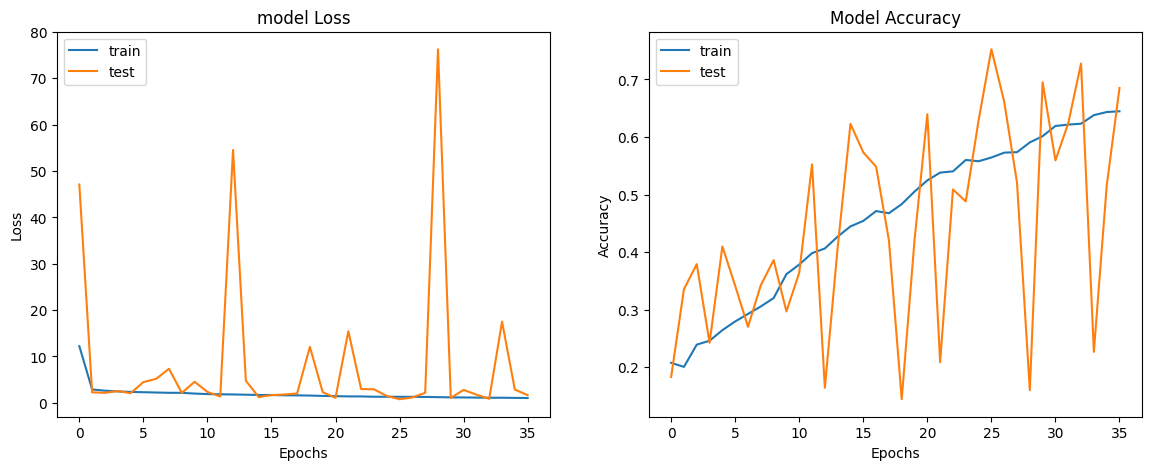

In [26]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,2)
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['train', 'test'], loc='upper left')

plt.subplot(1,2,1)
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.title('model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [27]:
train_loss, train_accu = model.evaluate(X_train, y_train)
test_loss, test_accu = model.evaluate(X_test, y_test)
print("final train accuracy = {:.2f} , validation accuracy = {:.2f}".format(train_accu*100, test_accu*100))

237/237 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - accuracy: 0.7812 - loss: 0.7090
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 43ms/step - accuracy: 0.6655 - loss: 0.9538
final train accuracy = 79.70 , validation accuracy = 75.25


In [29]:
def image_preprocessing(image):
    image = cv2.resize(image, (128, 128))
    # Convert grayscale to 3 channels by stacking
    image = np.stack((image,)*3, axis=-1)  # Stack the image 3 times along the last axis
    arrim = np.array(image)
    arrim = np.expand_dims(arrim, axis=0) # Add batch dimension
    arrim = arrim/255.
    return arrim

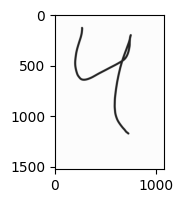

In [30]:
image = cv2.imread(r'/content/4.jpg',cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(2, 2))
plt.imshow(image,cmap='gray')
plt.show()

In [31]:
prediction = model.predict(image_preprocessing(image))
prediction
label_encoder.classes_[np.argmax(prediction)]

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


'times'

In [32]:
from sklearn.preprocessing import LabelEncoder
import joblib

# Save the label encoder to a file
joblib.dump(label_encoder, '/content/drive/MyDrive/minor project/label_encoder.pkl')

['/content/drive/MyDrive/minor project/label_encoder.pkl']

In [33]:
def strToSymbol(pred):

    if pred == "zero":
        return 0
    elif pred == "one":
        return 1
    elif pred == "two":
        return 2
    elif pred == "three":
        return 3
    elif pred == "four":
        return 4
    elif pred == "five":
        return 5
    elif pred == "six":
        return 6
    elif pred == "seven":
        return 7
    elif pred == "eight":
        return 8
    elif pred == "nine":
        return 9
    elif pred == "plus":
        return '+'
    elif pred == "minus":
        return '-'
    elif pred == "div":
        return '/'
    elif pred == "equal":
        return '='
    elif pred == "decimal":
        return '.'
    elif pred == "times":
        return '*'
def calculate(par1, sym, par2):
    if sym == "plus":
        return strToSymbol(par1) + strToSymbol(par2)
    elif sym == "minus":
        return strToSymbol(par1) - strToSymbol(par2)
    elif sym == "div":
        return strToSymbol(par1) / strToSymbol(par2)
    elif sym == "decimal":
        return str(par1 + sym + par2)
    elif sym == "times":
        return strToSymbol(par1) * strToSymbol(par2)

In [47]:
from PIL import Image # Import the Image class
image = Image.open("/content/10.webp")
equation = []

width, height = image.size
print("Width : " , width, " , Height : ", height)
plt.imshow(image)
plt.axis('off')
plt.show()

fig, axs= plt.subplots(1,3)
div = int(width/3)

for i in range(0,3):
    left = i * div
    top = 0
    right = (i+1) * div
    bottom = height

    temp_img = image.crop((left, top, right, bottom))

    temp_img = temp_img.resize((128,128))
    img = np.array(temp_img)
    img = np.expand_dims(img, axis=0)
    img = img.astype('float32')
    img /= 255


    pred = model.predict(img)
    result = np.argsort(pred)
    result = result[0][::-1]

    final_label = label_encoder.inverse_transform(np.array(result))

    equation.append(final_label[0])
    axs[i].imshow(temp_img)
    axs[i].set_title(str("Prediction: " + final_label[0]), fontsize = 14)

plt.show()
print(strToSymbol(equation[0]), strToSymbol(equation[1]) , strToSymbol(equation[2]), " = ", calculate(equation[0], equation[1],equation[2]))

FileNotFoundError: [Errno 2] No such file or directory: '/content/10.webp'

In [48]:
def confusion_mat(X, y):
    y_pred = model.predict(X)
    y_pred = np.argmax(y_pred, axis=1)
    y_target = np.argmax(y, axis=1)
    target_names = label_encoder.classes_

    print('Classification Report')
    target_names = label_encoder.classes_
    print(classification_report(y_target, y_pred, target_names=target_names))

    print('Confusion Matrix')
    cm_train = confusion_matrix(y_target , y_pred)
    print(cm_train)

    plt.figure(figsize=(5,5))
    plt.imshow(cm_train, interpolation='nearest')
    plt.colorbar()
    tick_mark = np.arange(len(target_names))
    _ = plt.xticks(tick_mark, target_names, rotation=90)
    _ = plt.yticks(tick_mark, target_names)

237/237 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step
Classification Report
              precision    recall  f1-score   support

     decimal       0.93      0.99      0.96       513
         div       0.99      0.84      0.91       544
       eight       0.56      0.86      0.68       429
       equal       0.92      0.86      0.89       554
        five       0.77      0.74      0.76       431
        four       0.85      0.78      0.82       431
       minus       0.87      0.96      0.91       549
        nine       0.71      0.65      0.68       430
         one       0.85      0.90      0.87       432
        plus       0.99      0.86      0.92       545
       seven       0.70      0.71      0.70       430
         six       0.66      0.54      0.59       429
       three       0.84      0.48      0.61       429
       times       0.89      0.92      0.91       555
         two       0.63      0.84      0.72       430
        zero       0.60      0.66      0.63       426

    accuracy     

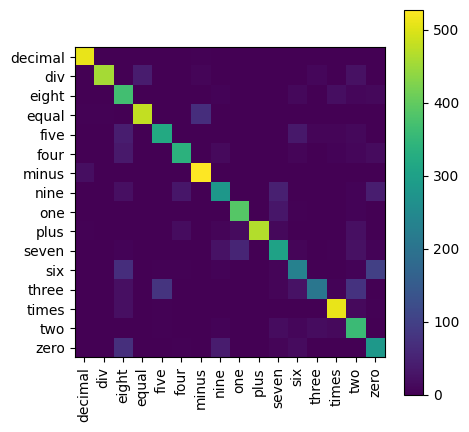

In [49]:
from sklearn.metrics import classification_report, confusion_matrix
confusion_mat(X_train,y_train)

32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 18ms/step
Classification Report
              precision    recall  f1-score   support

     decimal       0.88      1.00      0.94        76
         div       1.00      0.85      0.92        78
       eight       0.47      0.83      0.60        54
       equal       1.00      0.88      0.93        80
        five       0.77      0.61      0.68        54
        four       0.82      0.74      0.78        54
       minus       0.94      0.91      0.92        80
        nine       0.64      0.54      0.59        54
         one       0.77      0.96      0.85        55
        plus       1.00      0.91      0.95        78
       seven       0.60      0.63      0.61        54
         six       0.44      0.26      0.33        53
       three       0.70      0.30      0.42        54
       times       0.82      0.82      0.82        80
         two       0.47      0.76      0.58        54
        zero       0.56      0.63      0.59        52

    accuracy      

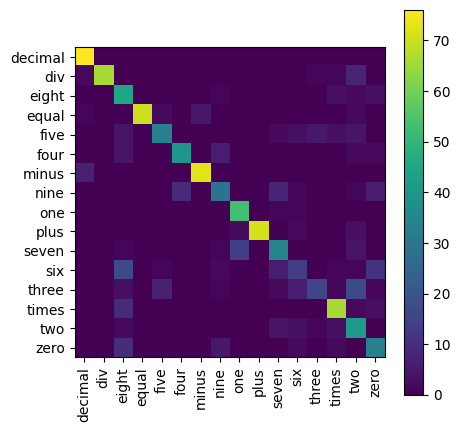

In [50]:
confusion_mat(X_test,y_test)